# Orthopyroxene-only and Liquid thermobarometry. 
- This notebook shows how to perform opx-only and opx-liq thermobarometry
- You can download the spreadsheet with data here: https://github.com/PennyWieser/Thermobar/blob/main/docs/Examples/Opx_and_Opx_Liq_Thermobarometry/Opx_Liq_Example.xlsx

### You need to install Thermobar once on your machine, if you haven't done this yet, uncomment the line below (remove the #)

In [2]:
#!pip install Thermobar

## First, load the necessary python things

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Thermobar as pt

## Now, load the data 

In [4]:
out=pt.import_excel('Opx_Liq_Example.xlsx', sheet_name="Paired_Opx_Liq")
my_input=out['my_input']
Liqs=out['Liqs']
Opxs=out['Opxs']

- At any point, you can do help(pt.function) to get some more information

- Alternatively, you can access the function names as well as the inputs like this:

## Example 1 - temperature for a known pressure and water content

### 1a - Equation 28a, fixed pressure
- Here, we calculate temperature using the H2O content given in the H2O_Liq column (the default), and P=5 kbar
- We choose T_Put2008_eq28a for temperature

In [5]:
Temp_T28a=pt.calculate_opx_liq_temp(opx_comps=Opxs, liq_comps=Liqs, 
                                    equationT="T_Put2008_eq28a", P=5)-273.15
Temp_T28a

0    1117.972951
1    1117.985930
2    1062.099511
3    1077.766688
4    1037.866109
dtype: float64

### 1b - As above, but overwriting the input spreadsheet water content with an integer. 

In [6]:
Temp_T28a_0H2O=pt.calculate_opx_liq_temp(opx_comps=Opxs, liq_comps=Liqs, 
                        equationT="T_Put2008_eq28a", P=5, H2O_Liq=0)-273.15 # convert to C
Temp_T28a_0H2O

0    1178.028325
1    1219.414583
2    1153.227807
3    1171.722220
4    1124.713370
dtype: float64

### 1c - we can also specify eq_tests=True to get a full dataframe back with all the components, as well as a number of equilibrium test values

In [7]:
Temp_T28a_0H2O_EqTests=pt.calculate_opx_liq_temp(opx_comps=Opxs, liq_comps=Liqs, 
                        equationT="T_Put2008_eq28a", P=5, H2O_Liq=0, eq_tests=True)
Temp_T28a_0H2O_EqTests

,T_K_calc,eq_tests_Kd_Fe_Mg_Fet,eq_tests_Kd_Fe_Mg_Fe2,SiO2_Liq,Kd Eq (Put2008+-0.06),TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,...,Di_Opx,Mgno_OPX,ln_Fm2Si2O6_liq,ln_FmAl2SiO6_liq,Kd_Fe_Mg_Fet,Kd_Fe_Mg_Fe2,Ideal_Kd,Delta_Kd_Fe_Mg_Fe2,Mgno_Liq_noFe3,Mgno_Liq_Fe2
0,1451.178325,0.251582,0.251582,51.1,Y,0.93,17.5,8.91,0.18,6.09,...,0.028142,0.828850,5.211708,-2.879647,0.251582,0.251582,0.304877,0.053295,0.549218,0.549218
1,1492.564583,0.165104,0.165104,51.5,N,1.19,19.2,8.70,0.19,4.98,...,0.068126,0.860725,5.202722,3.931199,0.165104,0.165104,0.303256,0.138151,0.505036,0.505036
2,1426.377807,0.187634,0.187634,59.1,N,0.54,19.1,5.22,0.19,3.25,...,0.074962,0.855382,5.851735,4.175071,0.187634,0.187634,0.277184,0.089550,0.526025,0.526025
3,1444.872220,0.211297,0.211297,52.5,N,0.98,19.2,8.04,0.20,4.99,...,0.053125,0.839637,5.426741,1.519044,0.211297,0.211297,0.300632,0.089335,0.525239,0.525239
4,1397.863370,0.144506,0.144506,56.2,N,0.34,20.4,5.88,0.20,2.58,...,0.033103,0.844054,6.297377,2.489832,0.144506,0.144506,0.290284,0.145777,0.438875,0.438875


## Example 2 - Calculating pressure for a known temperature

In [8]:
Liqs

,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq
0,51.1,0.93,17.5,8.91,0.18,6.09,11.50,3.53,0.17,0,0.15,3.8,0.0,0.0,0.0,0.0,0
1,51.5,1.19,19.2,8.70,0.19,4.98,10.00,3.72,0.42,0,0.14,6.2,0.0,0.0,0.0,0.0,1
2,59.1,0.54,19.1,5.22,0.19,3.25,7.45,4.00,0.88,0,0.31,6.2,0.0,0.0,0.0,0.0,2
3,52.5,0.98,19.2,8.04,0.20,4.99,9.64,4.15,0.21,0,0.14,6.2,0.0,0.0,0.0,0.0,3
4,56.2,0.34,20.4,5.88,0.20,2.58,7.18,6.02,1.02,0,0.23,6.2,0.0,0.0,0.0,0.0,4


### 2a - Pressure using equation 29a at 1300 K

In [9]:
Temp_P29a=pt.calculate_opx_only_press(opx_comps=Opxs, 
                                    equationP="P_Put2008_eq29c", T=1400)
Temp_P29a

c:\users\penny\box\postdoc\mybarometers\thermobar_outer\src\Thermobar\orthopyroxene_thermobarometry.py:237: UserWarning: The selected barometer uses the log of Cr2O3 component of Opx, which is zero for some of your compositions. This means the function will return infinity.
  w.warn('The selected barometer uses the log of Cr2O3 component of '


0    0.819640
1         NaN
2    5.598173
3    0.670134
4    0.584932
dtype: float64

In [10]:
Temp_P29a=pt.calculate_opx_liq_temp(opx_comps=Opxs, liq_comps=Liqs,
                                    equationT="T_Put2008_eq28a", P=1, H2O_Liq=5)
Temp_P29a

0    1357.706323
1    1392.687948
2    1336.650144
3    1352.358976
4    1312.353516
dtype: float64

In [11]:
Temp_P29a=pt.calculate_opx_liq_temp(opx_comps=Opxs, liq_comps=Liqs,
                                    equationT="T_Beatt1993_opx", P=1)
Temp_P29a

0    1419.341917
1    1397.607112
2    1391.361511
3    1404.738780
4    1362.794367
dtype: float64

In [12]:
Temp_P29a=pt.calculate_opx_liq_press_temp(opx_comps=Opxs, liq_comps=Liqs,
                                    equationT="T_Put2008_eq28a", equationP='P_Put2008_eq29a')
Temp_P29a

,P_kbar_calc,T_K_calc,Delta_P_kbar_Iter,Delta_T_K_Iter
0,3.327589,1384.287957,0.0,0.0
1,14.115631,1429.921163,0.0,0.0
2,10.438097,1355.822875,0.0,0.0
3,6.262139,1355.761762,0.0,0.0
4,5.892852,1314.189943,0.0,0.0


### 2b - Overwrite input water content with zero. Return equilibrium tests.

In [13]:
Temp_P29a_0H2O=pt.calculate_opx_liq_press(opx_comps=Opxs, liq_comps=Liqs, 
    equationP="P_Put_Global_Opx", T=1400,  eq_tests=False)
Temp_P29a_0H2O

0     2.838711
1    10.120604
2     8.661159
3     1.875401
4     2.745816
dtype: float64

In [14]:
Temp_P29a_0H2O=pt.calculate_opx_liq_press_temp(opx_comps=Opxs, liq_comps=Liqs, 
    equationP="P_Put2008_eq29b", equationT='T_Beatt1993_opx', H2O_Liq=10)
Temp_P29a_0H2O

,P_kbar_calc,T_K_calc,Delta_P_kbar_Iter,Delta_T_K_Iter
0,4.365005,1443.873537,0.000000e+00,0.000000e+00
1,19.416033,1529.808077,2.131628e-14,0.000000e+00
2,20.020225,1527.289560,3.552714e-14,2.273737e-13
3,10.781950,1475.317606,0.000000e+00,0.000000e+00
4,10.571965,1429.795921,0.000000e+00,0.000000e+00


### 2c - Can overwrite input Fe3Fet_Liq ratio (or 0 if didnt enter one) with an integer
- The affects delta Kd which only uses Fe2+ in the melt
- you can compare the equilibrium tests from Fet and Fe2 in the output columns. For the equilibrium test, we only use Fe2+

In [15]:
Temp_P29a_0H2O_30Fe=pt.calculate_opx_liq_press(opx_comps=Opxs, liq_comps=Liqs, 
                                               equationP="P_Put2008_eq29a", T=1300, H2O_Liq=0, 
                                               eq_tests=True, Fe3Fet_Liq=0.3)
Temp_P29a_0H2O_30Fe

,SiO2_Liq,P_kbar_calc,eq_tests_Kd_Fe_Mg_Fet,eq_tests_Kd_Fe_Mg_Fe2,Kd Eq (Put2008+-0.06),TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,...,Di_Opx,Mgno_OPX,ln_Fm2Si2O6_liq,ln_FmAl2SiO6_liq,Kd_Fe_Mg_Fet,Kd_Fe_Mg_Fe2,Ideal_Kd,Delta_Kd_Fe_Mg_Fe2,Mgno_Liq_noFe3,Mgno_Liq_Fe2
0,51.1,-0.440763,0.251582,0.359403,Y,0.93,17.5,8.91,0.18,6.09,...,0.028142,0.828850,5.211708,-2.879647,0.251582,0.359403,0.304877,0.054526,0.549218,0.635106
1,51.5,7.599754,0.165104,0.235863,N,1.19,19.2,8.70,0.19,4.98,...,0.068126,0.860725,5.202722,3.931199,0.165104,0.235863,0.303256,0.067392,0.505036,0.593105
2,59.1,5.020447,0.187634,0.268049,Y,0.54,19.1,5.22,0.19,3.25,...,0.074962,0.855382,5.851735,4.175071,0.187634,0.268049,0.277184,0.009135,0.526025,0.613220
3,52.5,0.947792,0.211297,0.301853,Y,0.98,19.2,8.04,0.20,4.99,...,0.053125,0.839637,5.426741,1.519044,0.211297,0.301853,0.300632,0.001221,0.525239,0.612473
4,56.2,1.102032,0.144506,0.206437,N,0.34,20.4,5.88,0.20,2.58,...,0.033103,0.844054,6.297377,2.489832,0.144506,0.206437,0.290284,0.083846,0.438875,0.527708


## Example 3 - Iterating pressure and temperature
- In reality, unles you are an experimentalist, you rarely know pressure and temperature
- In Keith Putirka's spreadsheets, you can link up columns to iterate P and T towards a solution, this can be done here using the function calculate_opx_liq_press_temp

### 3a - Iterating equation 29b from Putirka (2008) for P, and Beattie (1993) for temperature
- Without specifying anything else, you get a dataframe with columns for calculated pressure and temperature

In [24]:
PT_iter_29b_Beatt=pt.calculate_opx_liq_press_temp(opx_comps=Opxs, liq_comps=Liqs,
                                                  equationP="P_Put2008_eq29b", 
                                                  equationT="T_Beatt1993_opx", H2O_Liq=10)
PT_iter_29b_Beatt

,P_kbar_calc,T_K_calc,Delta_P_kbar_Iter,Delta_T_K_Iter
0,4.365005,1443.873537,0.000000e+00,0.000000e+00
1,19.416033,1529.808077,2.131628e-14,0.000000e+00
2,20.020225,1527.289560,3.552714e-14,2.273737e-13
3,10.781950,1475.317606,0.000000e+00,0.000000e+00
4,10.571965,1429.795921,0.000000e+00,0.000000e+00


## 3b - As above, but specifying eq_tests=True
- This returns equilibrium tests, you can check if they passed looking at the "Kd Eq (Put2008+-0.06)" column

In [17]:
PT_iter_29b_Beatt_EqTests=pt.calculate_opx_liq_press_temp(opx_comps=Opxs, liq_comps=Liqs, 
                       equationP="P_Put2008_eq29b", equationT="T_Beatt1993_opx", eq_tests=True)
PT_iter_29b_Beatt_EqTests

,P_kbar_calc,T_K_calc,Delta_P_kbar_Iter,Delta_T_K_Iter,eq_tests_Kd_Fe_Mg_Fet,eq_tests_Kd_Fe_Mg_Fe2,SiO2_Liq,Kd Eq (Put2008+-0.06),TiO2_Liq,Al2O3_Liq,...,Di_Opx,Mgno_OPX,ln_Fm2Si2O6_liq,ln_FmAl2SiO6_liq,Kd_Fe_Mg_Fet,Kd_Fe_Mg_Fe2,Ideal_Kd,Delta_Kd_Fe_Mg_Fe2,Mgno_Liq_noFe3,Mgno_Liq_Fe2
0,-2.083363,1396.863533,0.000000e+00,0.000000e+00,0.251582,0.251582,51.1,Y,0.93,17.5,...,0.028142,0.828850,5.211708,-2.879647,0.251582,0.251582,0.304877,0.053295,0.549218,0.549218
1,15.124832,1499.003345,2.131628e-14,2.273737e-13,0.165104,0.165104,51.5,N,1.19,19.2,...,0.068126,0.860725,5.202722,3.931199,0.165104,0.165104,0.303256,0.138151,0.505036,0.505036
2,15.723512,1496.583095,2.131628e-14,2.273737e-13,0.187634,0.187634,59.1,N,0.54,19.1,...,0.074962,0.855382,5.851735,4.175071,0.187634,0.187634,0.277184,0.089550,0.526025,0.526025
3,6.616612,1445.263817,0.000000e+00,0.000000e+00,0.211297,0.211297,52.5,N,0.98,19.2,...,0.053125,0.839637,5.426741,1.519044,0.211297,0.211297,0.300632,0.089335,0.525239,0.525239
4,6.404897,1400.627400,0.000000e+00,0.000000e+00,0.144506,0.144506,56.2,N,0.34,20.4,...,0.033103,0.844054,6.297377,2.489832,0.144506,0.144506,0.290284,0.145777,0.438875,0.438875


## Example 4: Orthopyroxene only barometry
- very similar to opx-liq functions, just dont need to specify liquid compositions
- Most common problem is that equation 29c uses the ln of the Cr2O3 component, which if you dont enter any Cr, means the function returns a NaN (as you can't ln a zero). 

In [18]:
Press=pt.calculate_opx_only_press(opx_comps=Opxs, equationP="P_Put2008_eq29c", T=1300)
Press

c:\users\penny\box\postdoc\mybarometers\thermobar_outer\src\Thermobar\orthopyroxene_thermobarometry.py:237: UserWarning: The selected barometer uses the log of Cr2O3 component of Opx, which is zero for some of your compositions. This means the function will return infinity.
  w.warn('The selected barometer uses the log of Cr2O3 component of '


0    0.631893
1         NaN
2    5.410426
3    0.482388
4    0.397185
dtype: float64

## Example 5: Plotting orthopyroxene compositions on a rhodes diagram
- Option 1, specify simple=True, just uses 0.29 +-0.07 from Putirka (2008)
- Option 2, specify a liquid composition (say lots of opxs from a single lava flow), calculates mean Si cation fraction for all liquids, uses this to calculate KD
- Option 3, specify a min and max Kd

### Step 1 - calculate Mg# for opx and liquid (can either treat FeT as Fe2, or partition into Fe2 and Fe3, only calculated Kd using Fe2)

In [19]:
opx_comps_Fe3=pt.calculate_orthopyroxene_liquid_components(liq_comps=Liqs,
                                            opx_comps=Opxs, Fe3Fet_Liq=0.2)

### Step 2 - calculate rhodes diagram lines between Mg#=0.4 and Mg#=0.7
- This gives the simple values of Kd=0.29+0.06

In [20]:
eq_lines_1=pt.calculate_opx_rhodes_diagram_lines(Min_Mgno=0.4, Max_Mgno=0.7)
eq_lines_1.head()

,Mg#_Liq,Eq_Opx_Mg# (Kd=0.23),Eq_Opx_Mg# (Kd=0.29),Eq_Opx_Mg# (Kd=0.35)
0,0.400000,0.743494,0.696864,0.655738
1,0.403030,0.745892,0.699521,0.658579
2,0.406061,0.748269,0.702159,0.661402
3,0.409091,0.750626,0.704777,0.664207
4,0.412121,0.752962,0.707375,0.666994


### Step 3 - Plot these lines, along with measured opxs. Here we draw symbols where we account for Fe3+ (diamond), and just using Fet in the glas (stars)

Text(0, 0.5, 'Mg# Opx')

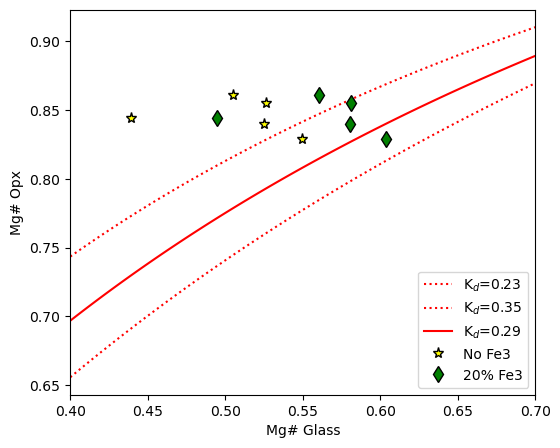

In [21]:
fig, (ax1) = plt.subplots(1, 1, figsize = (6,5))
ax1.plot(eq_lines_1['Mg#_Liq'], eq_lines_1['Eq_Opx_Mg# (Kd=0.23)'], ':r', label="K$_d$=0.23")
ax1.plot(eq_lines_1['Mg#_Liq'], eq_lines_1['Eq_Opx_Mg# (Kd=0.35)'], ':r', label="K$_d$=0.35")
ax1.plot(eq_lines_1['Mg#_Liq'], eq_lines_1['Eq_Opx_Mg# (Kd=0.29)'], '-r', label="K$_d$=0.29")
ax1.set_xlim([0.4, 0.7])
ax1.plot(opx_comps_Fe3['Mgno_Liq_noFe3'], opx_comps_Fe3['Mgno_OPX'], '*k', mfc='yellow', ms=8, label="No Fe3")
ax1.plot(opx_comps_Fe3['Mgno_Liq_Fe2'], opx_comps_Fe3['Mgno_OPX'], 'dk', mfc='green', ms=8, label="20% Fe3")
ax1.legend()
ax1.set_xlabel('Mg# Glass')
ax1.set_ylabel('Mg# Opx')

## Example 5 - Rhodes diagram using a Kd model based on the Si content of the liquid
- In this case, we enter a liquid composition into the rhodes diagram function
- As this works by averaging the Si content of all inputted liquid to calculate Kd, this only recomended if liquids very similar in composition)

In [22]:
eq_lines_2=pt.calculate_opx_rhodes_diagram_lines(Min_Mgno=0.4, Max_Mgno=0.7, liq_comps=Liqs)
eq_lines_2.head()

,Mg#_Liq,Eq_Opx_Mg# (Kd=0.23),Eq_Opx_Mg# (Kd=0.29),Eq_Opx_Mg# (Kd=0.35),Kd_XSi_P2008,Eq_Opx_Mg# (Kd_XSi_P2008),Eq_Opx_Mg# (Kd_XSi_P2008)+0.06,Eq_Opx_Mg# (Kd_XSi_P2008)-0.06
0,0.400000,0.743494,0.696864,0.655738,0.295247,0.693063,0.652371,0.739169
1,0.403030,0.745892,0.699521,0.658579,0.295247,0.695739,0.655225,0.741593
2,0.406061,0.748269,0.702159,0.661402,0.295247,0.698396,0.658062,0.743997
3,0.409091,0.750626,0.704777,0.664207,0.295247,0.701033,0.660880,0.746380
4,0.412121,0.752962,0.707375,0.666994,0.295247,0.703650,0.663681,0.748743


Text(0, 0.5, 'Mg# Opx')

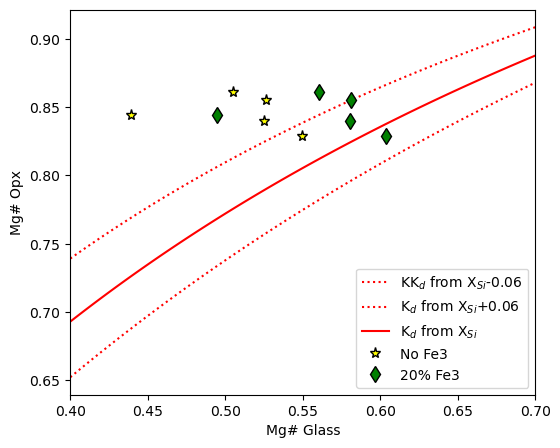

In [23]:
fig, (ax1) = plt.subplots(1, 1, figsize = (6,5))
ax1.plot(eq_lines_2['Mg#_Liq'], eq_lines_2['Eq_Opx_Mg# (Kd_XSi_P2008)-0.06'], ':r', label="KK$_d$ from X$_{Si}$-0.06")
ax1.plot(eq_lines_2['Mg#_Liq'], eq_lines_2['Eq_Opx_Mg# (Kd_XSi_P2008)+0.06'], ':r', label="K$_d$ from X$_{Si}$+0.06")
ax1.plot(eq_lines_2['Mg#_Liq'], eq_lines_2['Eq_Opx_Mg# (Kd_XSi_P2008)'], '-r', label="K$_d$ from X$_{Si}$")
ax1.set_xlim([0.4, 0.7])
ax1.plot(opx_comps_Fe3['Mgno_Liq_noFe3'], opx_comps_Fe3['Mgno_OPX'], '*k', mfc='yellow', ms=8, label="No Fe3")
ax1.plot(opx_comps_Fe3['Mgno_Liq_Fe2'], opx_comps_Fe3['Mgno_OPX'], 'dk', mfc='green', ms=8, label="20% Fe3")
ax1.legend()
ax1.set_xlabel('Mg# Glass')
ax1.set_ylabel('Mg# Opx')